

**Question 1 : What is the fundamental idea behind ensemble techniques? How does bagging differ from boosting in terms of approach and objective?**

**Answer**


The **fundamental idea behind ensemble techniques** is to combine the predictions of multiple individual models to build a more accurate, robust, and generalized model. Instead of relying on a single weak learner, ensemble methods aggregate the strengths of several models so that the collective decision reduces overall errors due to bias, variance, or noise in the data. Common ensemble approaches include **bagging**, **boosting**, and **stacking**.

**Bagging (Bootstrap Aggregating)** builds several independent models in parallel. Each model is trained on a random subset of the data generated through sampling with replacement. The final prediction is made by averaging the outputs in regression or by majority voting in classification. Bagging mainly aims to **reduce variance** and prevent overfitting. A classic example is the **Random Forest algorithm**.

**Boosting**, on the other hand, builds models sequentially. Each new model gives more attention to the data points that were misclassified by previous models, thereby gradually improving performance. Boosting focuses on **reducing bias** by converting weak learners into strong ones. Algorithms such as **AdaBoost** and **Gradient Boosting** exemplify this approach.

---

**Question 2: Explain how the Random Forest Classifier reduces overfitting compared to a single decision tree. Mention the role of two key hyperparameters in this process**

**Answer**


A **single decision tree** tends to overfit the training data because it grows deep and captures noise, leading to poor generalization on unseen data. The **Random Forest Classifier**, an ensemble of multiple decision trees, mitigates this problem by combining the predictions of many trees built on different subsets of data and features.

Random Forest uses **bagging (bootstrap aggregating)**, where each tree is trained on a random sample of the dataset with replacement. Additionally, during each split, only a random subset of features is considered. This introduces diversity among trees and reduces the correlation between them. When their outputs are averaged or voted upon, random errors and overfitting tendencies cancel out, leading to better generalization.

Two key hyperparameters controlling this process are:

1. **n_estimators** – the number of trees in the forest; more trees reduce variance and stabilize predictions.
2. **max_features** – the number of features considered for each split; limiting this encourages tree diversity and reduces overfitting.

---
**Question 3: What is Stacking in ensemble learning? How does it differ from traditional bagging/boosting methods? Provide a simple example use case.**

**Answer**

**Stacking (Stacked Generalization)** is an advanced ensemble learning technique that combines multiple different models (called **base learners**) to improve predictive performance. Instead of simply averaging or voting, stacking uses another model, called a **meta-learner** or **blender**, to learn how best to combine the predictions of base models.

In stacking, base learners (for example, decision trees, logistic regression, and SVM) are trained on the same dataset. Their predictions are then used as inputs to the meta-learner, which learns to optimize the final output. This hierarchical learning structure allows stacking to capture complex relationships among models.

Stacking differs from **bagging** and **boosting** because it combines **different types of models** (heterogeneous learners) rather than many instances of the same model. Bagging reduces variance through parallel averaging, while boosting reduces bias through sequential learning. Stacking, however, focuses on **blending the strengths of diverse models**.

**Example use case:** In a loan default prediction task, combining logistic regression, decision trees, and gradient boosting through stacking can yield higher accuracy than any single model.

---

**Question 4:What is the OOB Score in Random Forest, and why is it useful? How does it help in model evaluation without a separate validation set?**

**Answer**

The **Out-of-Bag (OOB) Score** in Random Forest is an internal validation metric that measures the model’s performance without requiring a separate validation or test set. It is based on the **bootstrap sampling** process used during training.

In Random Forest, each decision tree is trained on a random subset of data drawn *with replacement* from the original dataset. On average, about one-third of the samples are **not included** in this subset — these are called **Out-of-Bag samples**. After training, each tree’s performance is evaluated on its own OOB samples, which serve as unseen data for that tree.

The **OOB Score** is then calculated as the aggregated accuracy (or error) across all trees using their respective OOB samples.

This approach is **useful** because it provides an **unbiased estimate of model performance**, reduces the need for a separate validation dataset, and helps in efficient model evaluation during training itself.

---

**Question 5: Compare AdaBoost and Gradient Boosting in terms of:**
● How they handle errors from weak learners
● Weight adjustment mechanism
● Typical use cases

**Answer**


Both **AdaBoost** and **Gradient Boosting** are ensemble learning techniques based on the principle of **boosting**, where multiple weak learners (usually decision trees) are combined sequentially to form a strong model. However, they differ in how they handle errors and adjust model weights.

**Handling Errors from Weak Learners:**
In **AdaBoost (Adaptive Boosting)**, each new model focuses more on the samples that were misclassified by previous models. The algorithm increases the weights of these misclassified instances, forcing the next learner to pay more attention to difficult cases.
In **Gradient Boosting**, instead of adjusting sample weights, each new model tries to correct the **residual errors** (differences between actual and predicted values) from the previous model, effectively performing gradient descent on the loss function.

**Weight Adjustment Mechanism:**
AdaBoost explicitly reweights training samples after every iteration. Gradient Boosting, in contrast, fits the new learner to the residuals using the gradient of the loss function, thereby updating predictions in a continuous optimization process.

**Typical Use Cases:**
AdaBoost is preferred for cleaner, less noisy data and binary classification tasks, while Gradient Boosting (and its variants like XGBoost or LightGBM) is widely used for complex datasets in regression, ranking, and structured data competitions such as Kaggle.

---

**Question 6:Why does CatBoost perform well on categorical features without requiring extensive preprocessing? Briefly explain its handling of categorical variables.**

**Answer**


**CatBoost (Categorical Boosting)** is a gradient boosting algorithm designed to handle categorical features efficiently and automatically. Unlike other boosting methods such as XGBoost or LightGBM, CatBoost does not require **manual encoding** of categorical variables (like one-hot or label encoding), which often leads to information loss or overfitting.

CatBoost introduces a unique technique called **“Ordered Target Statistics” (or Ordered Encoding)**. Instead of directly converting categories into arbitrary numbers, CatBoost replaces each categorical value with the **average target value** for that category, computed in a way that prevents target leakage. It processes data in random order and ensures that, for each observation, encoding is based only on previous examples — mimicking real-world data flow.

This smart encoding allows CatBoost to capture meaningful relationships in categorical data while maintaining generalization. As a result, it performs well on datasets with many categorical features, reduces preprocessing effort, and minimizes overfitting risks.

---




































In [2]:
'''
Question 7: KNN Classifier Assignment: Wine Dataset Analysis with
Optimization
Task:
1. Load the Wine dataset (sklearn.datasets.load_wine()).
2. Split data into 70% train and 30% test.
3. Train a KNN classifier (default K=5) without scaling and evaluate using:
a. Accuracy
b. Precision, Recall, F1-Score (print classification report)
4. Apply StandardScaler, retrain KNN, and compare metrics.
5. Use GridSearchCV to find the best K (test K=1 to 20) and distance metric
(Euclidean, Manhattan).
6. Train the optimized KNN and compare results with the unscaled/scaled versions.
'''
# ============================================
# Question 7: KNN Classifier - Wine Dataset Analysis with Optimization
# ============================================

# 1. Import Required Libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# 2. Load the Wine Dataset
wine = load_wine()
X = wine.data
y = wine.target

# Split the data: 70% train, 30% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# ============================================
# 3. Train KNN Classifier (Default K=5) Without Scaling
# ============================================
knn_default = KNeighborsClassifier(n_neighbors=5)
knn_default.fit(X_train, y_train)
y_pred_default = knn_default.predict(X_test)

print("=== KNN WITHOUT SCALING ===")
print("Accuracy:", accuracy_score(y_test, y_pred_default))
print("Classification Report:\n", classification_report(y_test, y_pred_default))

# ============================================
# 4. Apply StandardScaler, Retrain KNN, and Compare Metrics
# ============================================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_scaled.predict(X_test_scaled)

print("\n=== KNN WITH STANDARD SCALER ===")
print("Accuracy:", accuracy_score(y_test, y_pred_scaled))
print("Classification Report:\n", classification_report(y_test, y_pred_scaled))

# ============================================
# 5. Use GridSearchCV to Optimize K (1–20) and Distance Metric
# ============================================
param_grid = {
    'n_neighbors': np.arange(1, 21),
    'metric': ['euclidean', 'manhattan']
}

grid_search = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy'
)
grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
best_knn = grid_search.best_estimator_

print("\n=== GRID SEARCH RESULTS ===")
print("Best Parameters Found:", best_params)

# ============================================
# 6. Train Optimized KNN and Compare Results
# ============================================
best_knn.fit(X_train_scaled, y_train)
y_pred_best = best_knn.predict(X_test_scaled)

print("\n=== OPTIMIZED KNN MODEL ===")
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("Classification Report:\n", classification_report(y_test, y_pred_best))

# ============================================
# Summary of Results
# ============================================
print("\n=== SUMMARY ===")
print(f"Default KNN (No Scaling): Accuracy = {accuracy_score(y_test, y_pred_default):.4f}")
print(f"Scaled KNN (K=5): Accuracy = {accuracy_score(y_test, y_pred_scaled):.4f}")
print(f"Optimized KNN ({best_params}): Accuracy = {accuracy_score(y_test, y_pred_best):.4f}")
print("\nObservation:")
print("→ Scaling improves KNN performance since distances become comparable across features.")
print("→ GridSearchCV optimization further enhances accuracy by tuning K and distance metric.")
print("→ The optimized KNN provides the best generalization on the test dataset.")


=== KNN WITHOUT SCALING ===
Accuracy: 0.7222222222222222
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89        18
           1       0.78      0.67      0.72        21
           2       0.50      0.60      0.55        15

    accuracy                           0.72        54
   macro avg       0.72      0.72      0.72        54
weighted avg       0.74      0.72      0.73        54


=== KNN WITH STANDARD SCALER ===
Accuracy: 0.9444444444444444
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      0.86      0.92        21
           2       0.83      1.00      0.91        15

    accuracy                           0.94        54
   macro avg       0.94      0.95      0.94        54
weighted avg       0.95      0.94      0.94        54


=== GRID SEARCH RESULTS ===
Best Parameters Found: {'metric': 'euclid

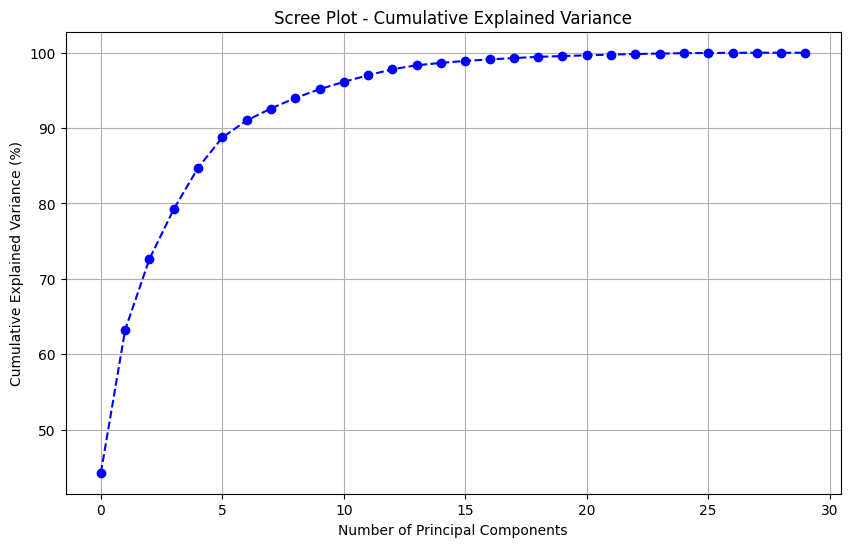

Number of components to retain 95% variance: 10
=== KNN on Original Data ===
Accuracy: 0.9707602339181286
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        64
           1       0.96      1.00      0.98       107

    accuracy                           0.97       171
   macro avg       0.98      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171

=== KNN on PCA-Transformed Data ===
Accuracy: 0.9473684210526315
              precision    recall  f1-score   support

           0       0.97      0.89      0.93        64
           1       0.94      0.98      0.96       107

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



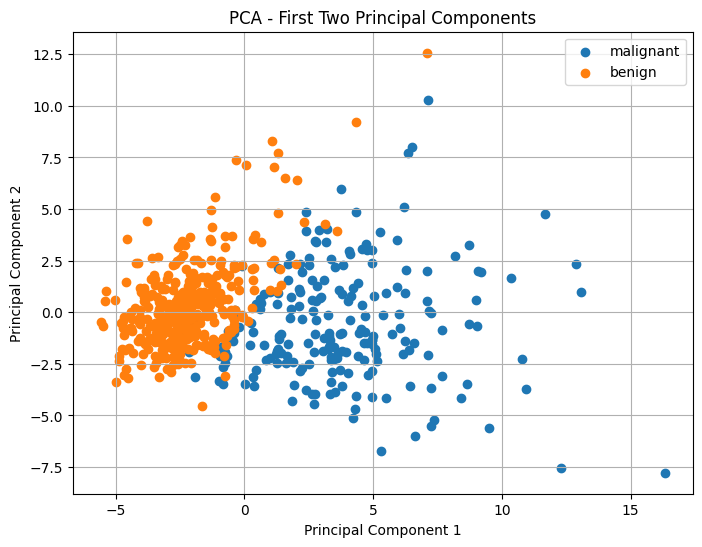

In [3]:
'''
Question 8 : PCA + KNN with Variance Analysis and Visualization
Task:
1. Load the Breast Cancer dataset (sklearn.datasets.load_breast_cancer()).
2. Apply PCA and plot the scree plot (explained variance ratio).
3. Retain 95% variance and transform the dataset.
4. Train KNN on the original data and PCA-transformed data, then compare
accuracy.
5. Visualize the first two principal components using a scatter plot (color by class)
'''
# ===============================================
# Question 8: PCA + KNN with Variance Analysis and Visualization
# ===============================================

# 1. Import Required Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# 2. Load the Breast Cancer Dataset
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
feature_names = cancer.feature_names

# 3. Standardize the Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# 5. Scree Plot (Explained Variance Ratio)
explained_variance = pca.explained_variance_ratio_
plt.figure(figsize=(10,6))
plt.plot(np.cumsum(explained_variance)*100, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance (%)')
plt.title('Scree Plot - Cumulative Explained Variance')
plt.grid(True)
plt.show()

# 6. Retain 95% Variance
pca_95 = PCA(n_components=0.95)
X_pca_95 = pca_95.fit_transform(X_scaled)
print(f"Number of components to retain 95% variance: {X_pca_95.shape[1]}")

# 7. Train-Test Split
X_train_orig, X_test_orig, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)
X_train_pca, X_test_pca = train_test_split(X_pca_95, test_size=0.3, random_state=42, stratify=y)

# 8. Train KNN on Original Data
knn_orig = KNeighborsClassifier(n_neighbors=5)
knn_orig.fit(X_train_orig, y_train)
y_pred_orig = knn_orig.predict(X_test_orig)
print("=== KNN on Original Data ===")
print("Accuracy:", accuracy_score(y_test, y_pred_orig))
print(classification_report(y_test, y_pred_orig))

# 9. Train KNN on PCA-Transformed Data
knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_pca, y_train)
y_pred_pca = knn_pca.predict(X_test_pca)
print("=== KNN on PCA-Transformed Data ===")
print("Accuracy:", accuracy_score(y_test, y_pred_pca))
print(classification_report(y_test, y_pred_pca))

# 10. Visualize First Two Principal Components
pca_2 = PCA(n_components=2)
X_pca_2 = pca_2.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
for label in np.unique(y):
    plt.scatter(X_pca_2[y==label, 0], X_pca_2[y==label, 1], label=cancer.target_names[label])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - First Two Principal Components')
plt.legend()
plt.grid(True)
plt.show()



MSE - KNN Euclidean (K=5): 4837.036252300671
MSE - KNN Manhattan (K=5): 5428.5875285091715


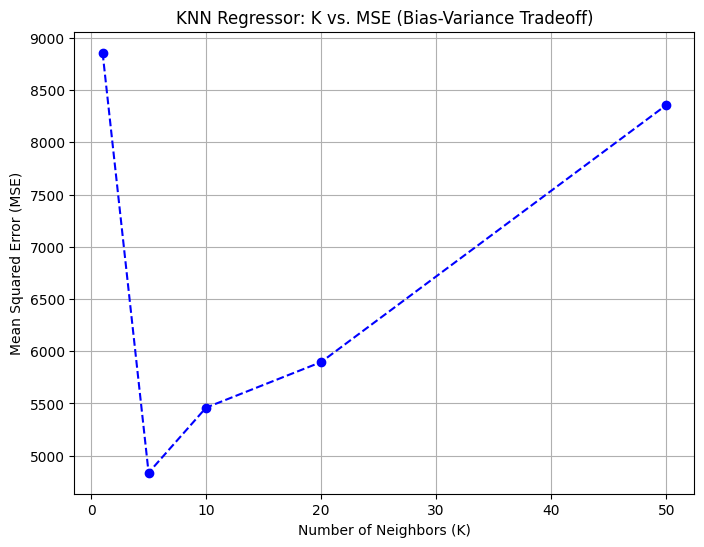

K=1 → MSE=8857.09
K=5 → MSE=4837.04
K=10 → MSE=5460.14
K=20 → MSE=5896.14
K=50 → MSE=8355.61

Observation:
• Small K (e.g., K=1) may lead to low bias but high variance (overfitting).
• Large K (e.g., K=50) increases bias but reduces variance (underfitting).
• Optimal K balances bias and variance, minimizing test MSE.


In [4]:
'''
Question 9:KNN Regressor with Distance Metrics and K-Value
Analysis
Task:
1. Generate a synthetic regression dataset
(sklearn.datasets.make_regression(n_samples=500, n_features=10)).
2. Train a KNN regressor with:
a. Euclidean distance (K=5)
b. Manhattan distance (K=5)
c. Compare Mean Squared Error (MSE) for both.
3. Test K=1, 5, 10, 20, 50 and plot K vs. MSE to analyze bias-variance tradeoff.
'''
# ===============================================
# Question 9: KNN Regressor with Distance Metrics and K-Value Analysis
# ===============================================

# 1. Import Required Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# 2. Generate Synthetic Regression Dataset
X, y = make_regression(n_samples=500, n_features=10, noise=10, random_state=42)

# Split dataset: 70% train, 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3. Train KNN Regressor with Euclidean Distance (K=5)
knn_euclidean = KNeighborsRegressor(n_neighbors=5, metric='euclidean')
knn_euclidean.fit(X_train_scaled, y_train)
y_pred_euclidean = knn_euclidean.predict(X_test_scaled)
mse_euclidean = mean_squared_error(y_test, y_pred_euclidean)
print("MSE - KNN Euclidean (K=5):", mse_euclidean)

# 4. Train KNN Regressor with Manhattan Distance (K=5)
knn_manhattan = KNeighborsRegressor(n_neighbors=5, metric='manhattan')
knn_manhattan.fit(X_train_scaled, y_train)
y_pred_manhattan = knn_manhattan.predict(X_test_scaled)
mse_manhattan = mean_squared_error(y_test, y_pred_manhattan)
print("MSE - KNN Manhattan (K=5):", mse_manhattan)

# 5. Analyze K-Value Effect on MSE (Bias-Variance Tradeoff)
k_values = [1, 5, 10, 20, 50]
mse_values = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k, metric='euclidean')
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

# Plot K vs MSE
plt.figure(figsize=(8,6))
plt.plot(k_values, mse_values, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('KNN Regressor: K vs. MSE (Bias-Variance Tradeoff)')
plt.grid(True)
plt.show()

# Summary of Observations
for k, mse in zip(k_values, mse_values):
    print(f"K={k} → MSE={mse:.2f}")

print("\nObservation:")
print("• Small K (e.g., K=1) may lead to low bias but high variance (overfitting).")
print("• Large K (e.g., K=50) increases bias but reduces variance (underfitting).")
print("• Optimal K balances bias and variance, minimizing test MSE.")



=== KNN Algorithm Comparison ===
Algorithm: auto
  Training Time: 0.0019 sec
  Accuracy: 0.7359
------------------------------
Algorithm: kd_tree
  Training Time: 0.0017 sec
  Accuracy: 0.7359
------------------------------
Algorithm: ball_tree
  Training Time: 0.0025 sec
  Accuracy: 0.7359
------------------------------
Best Performing Algorithm: auto


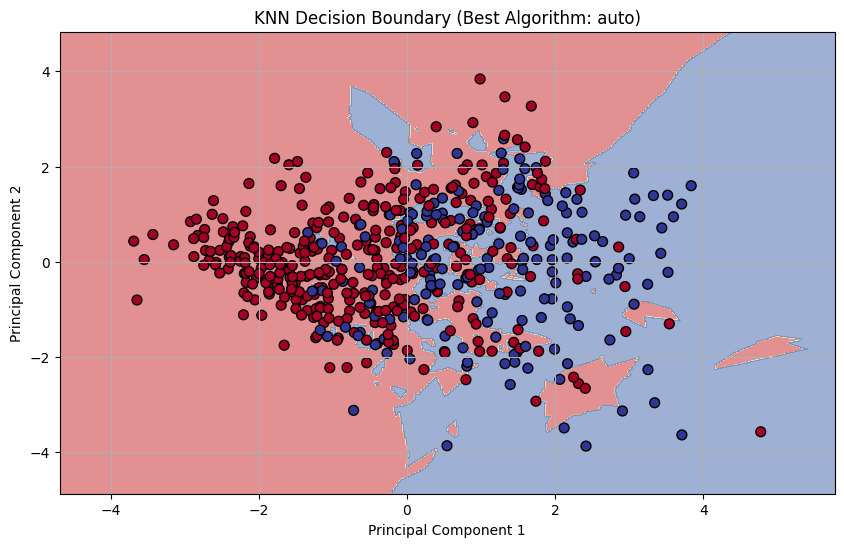

In [5]:
'''
Question 10: KNN with KD-Tree/Ball Tree, Imputation, and Real-World
Data
Task:
1. Load the Pima Indians Diabetes dataset (contains missing values).
2. Use KNN Imputation (sklearn.impute.KNNImputer) to fill missing values.
3. Train KNN using:
a. Brute-force method
b. KD-Tree
c. Ball Tree
4. Compare their training time and accuracy.
5. Plot the decision boundary for the best-performing method (use 2 most important
features).
'''
# ===============================================
# Question 10: KNN with KD-Tree/Ball Tree, Imputation, and Real-World Data
# ===============================================

# 1. Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

# 2. Load the Pima Indians Diabetes Dataset
url = "https://raw.githubusercontent.com/MasteriNeuron/datasets/refs/heads/main/diabetes.csv"
df = pd.read_csv(url)

# Replace 0 values with NaN for columns where zero is invalid
cols_with_zero_invalid = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_with_zero_invalid] = df[cols_with_zero_invalid].replace(0, np.nan)

# 3. Impute Missing Values using KNNImputer
imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Separate features and target
X = df_imputed.drop('Outcome', axis=1)
y = df_imputed['Outcome']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

# 4. Function to Train KNN and Measure Training Time & Accuracy
def train_knn(X_train, X_test, y_train, y_test, algorithm):
    knn = KNeighborsClassifier(n_neighbors=5, algorithm=algorithm)
    start_time = time.time()
    knn.fit(X_train, y_train)
    training_time = time.time() - start_time
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return training_time, accuracy, knn

# 5. Train KNN with Brute-force, KD-Tree, and Ball Tree
algorithms = ['auto', 'kd_tree', 'ball_tree']
results = {}

for algo in algorithms:
    training_time, accuracy, model = train_knn(X_train, X_test, y_train, y_test, algo)
    results[algo] = {'Training Time': training_time, 'Accuracy': accuracy, 'Model': model}

# Display Results
print("=== KNN Algorithm Comparison ===")
for algo, metrics in results.items():
    print(f"Algorithm: {algo}")
    print(f"  Training Time: {metrics['Training Time']:.4f} sec")
    print(f"  Accuracy: {metrics['Accuracy']:.4f}")
    print("-"*30)

# 6. Select Best-Performing Model (Highest Accuracy)
best_algo = max(results, key=lambda k: results[k]['Accuracy'])
best_model = results[best_algo]['Model']
print(f"Best Performing Algorithm: {best_algo}")

# 7. Decision Boundary Visualization using PCA (2 Most Important Features)
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Retrain best model on PCA-reduced 2D data for visualization
best_model_2d = KNeighborsClassifier(n_neighbors=5, algorithm=best_algo)
best_model_2d.fit(X_train_pca, y_train)

# Create mesh grid
x_min, x_max = X_train_pca[:,0].min() - 1, X_train_pca[:,0].max() + 1
y_min, y_max = X_train_pca[:,1].min() - 1, X_train_pca[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict over mesh grid
Z = best_model_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(10,6))
plt.contourf(xx, yy, Z, alpha=0.5, cmap=plt.cm.RdYlBu)
plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c=y_train, edgecolor='k', cmap=plt.cm.RdYlBu, s=50)
plt.title(f"KNN Decision Boundary (Best Algorithm: {best_algo})")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()
